bold text
# Trabalho Prático 02 - Análise de Dados com NumPy, Pandas e Matplotlib

Este notebook contém um conjunto de exercícios práticos sobre análise de dados usando as bibliotecas **NumPy**, **Pandas** e **Matplotlib**.
Os exercícios envolvem o uso de um dataset de vendas fictício de uma loja de e-commerce para desenvolver uma análise completa, incluindo
limpeza de dados, manipulação de colunas e visualização.

Baixe o arquivo `sales_data.csv` e use-o para responder às perguntas abaixo.

---


## Questão 1: Carregar os Dados

Carregue os dados de um arquivo CSV usando **Pandas** e exiba as 5 primeiras linhas.

Dica: Utilize `pd.read_csv()` e `head()` para verificar se os dados foram carregados corretamente.

In [ ]:
import pandas as pd
df = pd.read_csv('/content/sample_data/sales_data.csv')
df.head()

,Order ID,Product,Category,Price,Quantity,Date,City,Payment Method
0,101.0,Laptop,Electronics,1200.50,2.0,2023-01-15,New York,Credit Card
1,102.0,Smartphone,Electronics,800.99,5.0,2023-02-20,Los Angeles,PayPal
2,103.0,Tablet,Electronics,300.00,3.0,2023-03-05,NaN,NaN
3,104.0,Monitor,Electronics,150.00,4.0,2023-03-18,Houston,Debit Card
4,105.0,Keyboard,Accessories,25.99,10.0,2023-04-10,Phoenix,Credit Card


## Questão 2: Descrever as Variáveis Numéricas

Usando **Pandas**, exiba uma descrição estatística dos dados numéricos, como `Price` e `Quantity`.

Dica: Use o método `describe()` para obter a média, desvio padrão, mínimo e máximo das colunas numéricas.

In [ ]:
df.describe()

,Order ID,Price,Quantity
count,900.000000,900.000000,902.000000
mean,105.477778,373.522456,6.974501
std,2.857100,946.144709,11.582183
min,101.000000,19.990000,1.000000
25%,103.000000,45.000000,3.000000
50%,105.000000,180.750000,4.000000
75%,108.000000,300.000000,10.000000
max,110.000000,12005.000000,150.000000


## Questão 3: Limpeza de Dados

Verifique se há valores ausentes e trate-os, se necessário. Substitua valores ausentes ou remova linhas com valores faltantes.

Dica: Utilize `isnull().sum()` para identificar valores ausentes e `dropna()` ou `fillna()` para limpeza.

In [ ]:
df.isnull().sum()
df.dropna(inplace=True)
df

,Order ID,Product,Category,Price,Quantity,Date,City,Payment Method
0,101.0,Laptop,Electronics,1200.50,2.0,2023-01-15,New York,Credit Card
1,102.0,Smartphone,Electronics,800.99,5.0,2023-02-20,Los Angeles,PayPal
3,104.0,Monitor,Electronics,150.00,4.0,2023-03-18,Houston,Debit Card
4,105.0,Keyboard,Accessories,25.99,10.0,2023-04-10,Phoenix,Credit Card
5,106.0,Mouse,Accessories,19.99,12.0,2023-05-15,Philadelphia,Debit Card
...,...,...,...,...,...,...,...,...
990,101.0,Laptop,Electronics,1200.50,2.0,2023-01-15,New York,Credit Card
991,102.0,Smartphone,Electronics,800.99,5.0,2023-02-20,Los Angeles,PayPal
993,104.0,Monitor,Electronics,12005.00,4.0,2023-03-18,Houston,Debit Card
995,106.0,Mouse,Accessories,19.99,12.0,2023-05-15,Philadelphia,Debit Card


## Questão 4: Filtrar e Agrupar Dados por Cidade

Usando **Pandas**, agrupe os dados por cidade e calcule o total de vendas (preço * quantidade) para cada cidade.

Dica: Crie uma nova coluna `Total Sales` que multiplique `Price` por `Quantity`. Em seguida, use `groupby()` e `sum()`.

In [ ]:
df['Total Sales'] = df['Price'] * df['Quantity']
df.groupby(by=['City']).sum(['Total Sales'])

,Order ID,Price,Quantity,Total Sales
City,,,,
Chicago,4120.0,23705.00,267.0,115215.00
Dallas,5232.0,14120.00,720.0,211800.00
Houston,4992.0,19055.00,192.0,76220.00
Los Angeles,4386.0,34442.57,360.0,288356.40
New York,3939.0,46819.50,78.0,93639.00
Philadelphia,5194.0,979.51,588.0,11754.12
Phoenix,4725.0,1169.55,450.0,11695.50
San Antonio,4173.0,2944.11,273.0,20608.77
San Diego,5184.0,12000.00,48.0,12000.00


## Questão 5: Análise de Categorias

Encontre as 5 categorias de produtos mais vendidas em termos de quantidade e plote um gráfico de barras.

Dica: Agrupe por `Category` e utilize `sum()` para quantidade, então use **Matplotlib** para criar o gráfico.

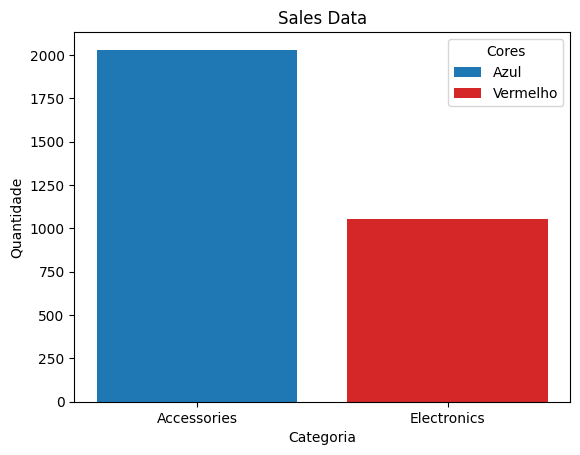

In [ ]:
import matplotlib.pyplot as plt
qtd = df.groupby(by='Category').sum('Quantity')['Quantity']
category = qtd.index
quantity = qtd.values
label = ['Azul', 'Vermelho']
color = ['tab:blue', 'tab:red']
plt.bar(category, quantity, label=label, color=color)
plt.title('Sales Data')
plt.xlabel('Categoria')
plt.ylabel('Quantidade')
plt.legend(title='Cores')
plt.show()

## Questão 6: Análise de Vendas por Mês

Extraia o mês da coluna `Date`, crie uma nova coluna `Month` e calcule as vendas totais por mês.

Dica: Utilize `pd.to_datetime()` para converter a coluna `Date`, e então use `dt.month` para extrair o mês.

In [ ]:
df['Month'] = pd.to_datetime(df['Date']).dt.month
df.groupby(by=['Month']).sum(['Total Sales'])

,Order ID,Price,Quantity,Total Sales
Month,,,,
1,3939.0,46819.50,78.0,93639.00
2,4386.0,34442.57,360.0,288356.40
3,9112.0,42760.00,459.0,191435.00
4,4725.0,1169.55,450.0,11695.50
5,5194.0,979.51,588.0,11754.12
6,4173.0,2944.11,273.0,20608.77
7,5184.0,12000.00,48.0,12000.00
8,5232.0,14120.00,720.0,211800.00
9,3960.0,18331.25,108.0,54993.75


## Questão 7: Histograma de Preços

Usando **Matplotlib**, crie um histograma para visualizar a distribuição dos preços dos produtos.

Dica: Use `plt.hist()` para criar o histograma, ajustando o número de bins para uma melhor visualização.

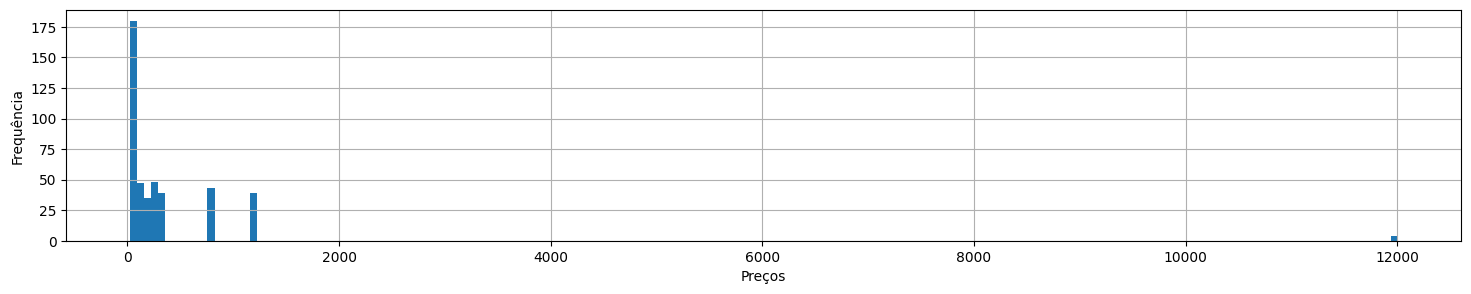

In [ ]:
plt.figure(figsize=[18,3])
plt.hist(df['Price'], bins='auto')
plt.grid(True)
plt.xlabel('Preços')
plt.ylabel('Frequência')
plt.show()


## Questão 8: Vendas por Método de Pagamento

Crie um gráfico de setores (pizza) para mostrar a proporção de vendas por cada método de pagamento.

Dica: Utilize `groupby()` para somar as vendas por `Payment Method` e então `plt.pie()` para o gráfico.

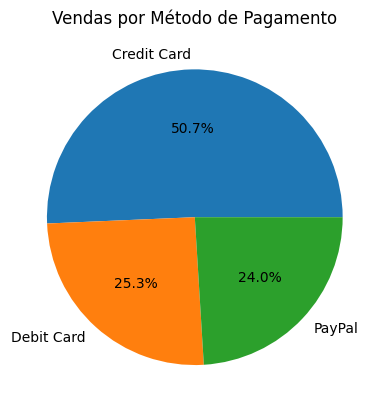

In [ ]:
qtd = df.groupby(by='Payment Method').sum(['Quantity'])['Quantity']
tipos = qtd.index
quantidade = qtd.values
plt.pie(quantidade, labels=tipos, autopct='%1.1f%%')
plt.title('Vendas por Método de Pagamento')
plt.show()

## Questão 9: Correlação entre Preço e Quantidade Vendida

Usando **NumPy** e **Pandas**, verifique a correlação entre `Price` e `Quantity` para avaliar se existe uma relação entre o preço e a quantidade de itens vendidos.

Dica: Use `corr()` do **Pandas** ou `np.corrcoef()` para calcular a correlação.

In [ ]:
import numpy as np
np.corrcoef(df['Price'], df["Quantity"])


array([[ 1.        , -0.06095863],
       [-0.06095863,  1.        ]])

## Questão 10: Análise Temporal de Vendas

Crie uma série temporal com o total de vendas diárias e plote um gráfico de linha para observar tendências ao longo do tempo.

Dica: Use `groupby()` com a coluna `Date` para somar as vendas diárias e `plot()` para gerar o gráfico de linha.

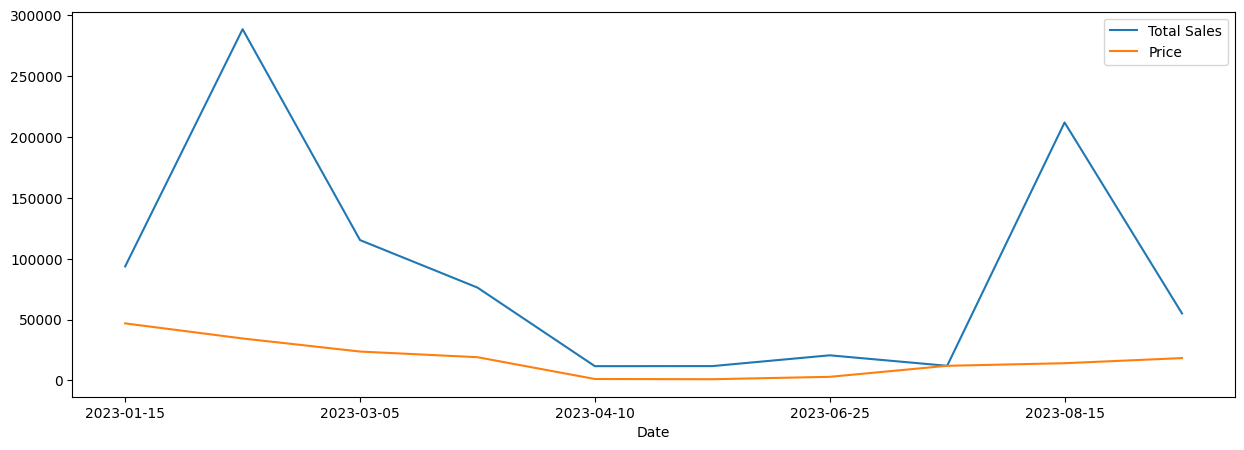

In [ ]:
df.groupby(by=['Date']).sum(['Quantity'])[['Total Sales', 'Price']].plot(figsize=(15,5))
plt.show()

### Questão 11: Conclusão e Análise

Após realizar os exercícios acima, conduza uma análise final respondendo às seguintes perguntas sobre o conjunto de dados:

1. Quais foram as cinco cidades com maior volume de vendas?
2. Qual o impacto médio das margens de lucro na receita total?
3. Como podemos detectar os outliers presentes no nosso conjunto de dados?
4. Qual foi o método de pagamento mais utilizado e qual o menos utilizado?
5. Observou algum padrão sazonal nas vendas mensais?

Responda cada uma das perguntas acima com base nas análises realizadas.

1. Chicago, Dallas, Houston, Los Angeles, New York;
2. Supondo que o custo seja 65% do preço, o lucro será 35% da receita total. O impacto das margens de lucro é inversamente proporcional ao custo;
3. Os outliers seriam os valores mais distantes no histograma;
4. O método de pagamento mais utilizado foi o cartão de crédito, e o menos utilizado foi o PayPal;
5. Há picos de vendas nos meses 02 e 08.

In [ ]:
df['Cost'] = df['Price'] * 0.65 * df['Quantity']
lc = df['Total Sales'].sum() - df['Cost'].sum()
tp = lc / df['Total Sales'].sum()
print('%1.1f%%'%(tp*100))

35.0%
